<a href="https://colab.research.google.com/github/Carter-and/Business-Analysis-Notebooks/blob/master/Carter_mulitple_regression_fb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this assignment, I did multiple regression analysis to look at advertising campaigns that ran on Facebook. Specifically, looking at Spend in relationship to : reach, frequency, and clicks.

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
DATA_URL = 'http://128.138.93.164/aprd6342/data/TravelPonyFacebook.csv'
df = pd.read_csv(DATA_URL)

In [0]:
df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


In [0]:
df.shape

(3705, 20)

Remove Zeros from Amount Spent - that is, everything greater than 1, bc I noticed some 0.99 amounts that I also wanted to get rid of

In [0]:
df.loc[(df[['Amount Spent (USD)']] >1).all(axis=1)]

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,2013-06-27,2013-06-27,Bob Jackson,Travelpony-Page Likes-US-13-65,1143,1.699913,1943,3,3,4.31,0,0,0,0,0,0,0,0,0.00,0.000000
3698,2013-06-13,2013-06-13,Bob Jackson,Ad 1,513,1.000000,513,4,3,1.97,1,3,2,2,0,0,0,0,1.97,0.656667
3700,2013-06-11,2013-06-11,Bob Jackson,Ad 1,298,1.003356,299,2,1,1.05,0,1,1,1,0,0,0,0,0.00,1.050000
3701,2013-06-10,2013-06-10,Bob Jackson,Ad 1,514,1.060311,545,3,3,1.60,0,3,3,3,0,0,0,0,0.00,0.533333


Histogram of amount spent

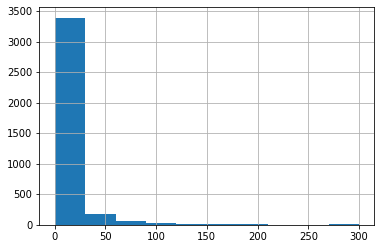

In [0]:
df['Amount Spent (USD)'].hist(bins=10)

Scatter plots for spend and: reach, frequency, impressions and clicks

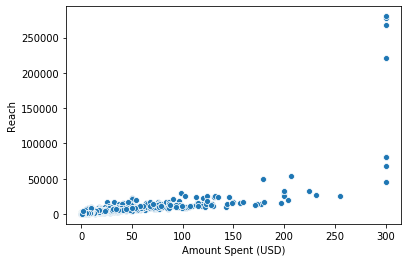

In [0]:
sns.scatterplot (x='Amount Spent (USD)', y = 'Reach', data = df)

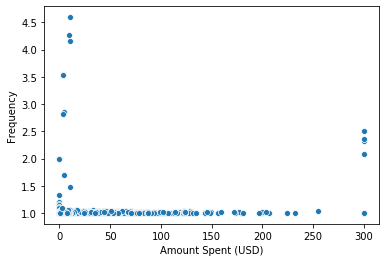

In [0]:
sns.scatterplot (x='Amount Spent (USD)', y = 'Frequency', data = df)

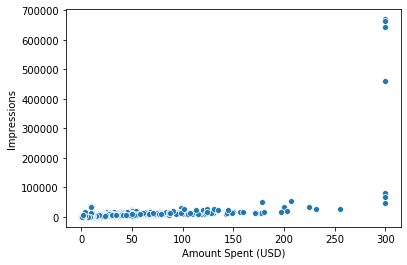

In [0]:
sns.scatterplot (x='Amount Spent (USD)', y = 'Impressions', data = df)

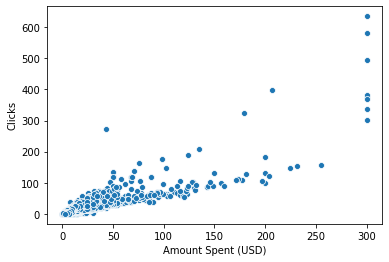

In [0]:
sns.scatterplot (x='Amount Spent (USD)', y = 'Clicks', data = df)

Change Campaign Name to Categorical Value - This was as good as I could get it - all of the dummies are atttached to the end of the df

In [0]:
df_dummies = pd.get_dummies(df, columns = ["Campaign Name"])

In [0]:
df.dtypes

Start Date                         object
End Date                           object
Account                            object
Campaign Name                      object
Reach                               int64
Frequency                         float64
Impressions                         int64
Clicks                              int64
Unique Clicks                       int64
Amount Spent (USD)                float64
Page Likes                          int64
Page Engagement                     int64
Post Engagement                     int64
Post Likes                          int64
Post Comments                       int64
Post Shares                         int64
Photo Views                         int64
Website Clicks                      int64
Cost per Page Like (USD)          float64
Cost per Page Engagement (USD)    float64
dtype: object

In [0]:
df_dummies.head()

,Start Date,End Date,Account,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD),Campaign Name_Ad 1,Campaign Name_Cyber Weekend,Campaign Name_Nanigans_2_637,Campaign Name_Nanigans_2_638,Campaign Name_Nanigans_2_639,Campaign Name_Nanigans_2_640,Campaign Name_Nanigans_2_641,Campaign Name_Nanigans_2_642,Campaign Name_Nanigans_2_643,Campaign Name_Nanigans_2_644,Campaign Name_Nanigans_2_645,Campaign Name_Nanigans_2_646,Campaign Name_Nanigans_2_647,Campaign Name_Nanigans_2_648,Campaign Name_Nanigans_2_651,Campaign Name_Nanigans_2_652,Campaign Name_Nanigans_2_653,Campaign Name_Nanigans_2_654,Campaign Name_Nanigans_2_655,Campaign Name_Nanigans_2_656,Campaign Name_Nanigans_2_659,...,Campaign Name_Simple_Multi_Fill_Campaign_2_562,Campaign Name_Simple_Multi_Fill_Campaign_2_563,Campaign Name_Simple_Multi_Fill_Campaign_2_564,Campaign Name_Simple_Multi_Fill_Campaign_2_565,Campaign Name_Simple_Multi_Fill_Campaign_2_566,Campaign Name_Simple_Multi_Fill_Campaign_2_567,Campaign Name_Simple_Multi_Fill_Campaign_2_568,Campaign Name_Simple_Multi_Fill_Campaign_2_569,Campaign Name_Simple_Multi_Fill_Campaign_2_573,Campaign Name_Simple_Multi_Fill_Campaign_2_575,Campaign Name_Simple_Multi_Fill_Campaign_2_579,Campaign Name_Simple_Multi_Fill_Campaign_2_583,Campaign Name_Simple_Multi_Fill_Campaign_2_596,Campaign Name_Simple_Multi_Fill_Campaign_2_597,Campaign Name_Simple_Multi_Fill_Campaign_2_598,Campaign Name_Simple_Multi_Fill_Campaign_2_599,Campaign Name_Simple_Multi_Fill_Campaign_2_600,Campaign Name_Simple_Multi_Fill_Campaign_2_601,Campaign Name_Simple_Multi_Fill_Campaign_2_602,Campaign Name_Simple_Multi_Fill_Campaign_2_603,Campaign Name_Simple_Multi_Fill_Campaign_2_617,Campaign Name_Simple_Multi_Fill_Campaign_2_618,Campaign Name_Simple_Multi_Fill_Campaign_2_619,Campaign Name_Simple_Multi_Fill_Campaign_2_620,Campaign Name_Simple_Multi_Fill_Campaign_2_621,Campaign Name_Simple_Multi_Fill_Campaign_2_622,Campaign Name_Simple_Multi_Fill_Campaign_2_623,Campaign Name_Simple_Multi_Fill_Campaign_2_624,Campaign Name_Simple_Multi_Fill_Campaign_2_625,Campaign Name_Simple_Multi_Fill_Campaign_2_626,Campaign Name_Simple_Multi_Fill_Campaign_2_627,Campaign Name_Simple_Multi_Fill_Campaign_2_631,Campaign Name_Simple_Multi_Fill_Campaign_2_633,Campaign Name_Simple_Multi_Fill_Campaign_2_634,Campaign Name_Simple_Multi_Fill_Campaign_2_635,Campaign Name_Simple_Multi_Fill_Campaign_2_636,Campaign Name_TravelPony: Conversion Test,Campaign Name_TravelPony: General Ads,Campaign Name_Travelpony-Page Likes-US-13-65,Campaign Name_http://travelpony...-Clicks-US-13-65
0,2013-12-02,2013-12-02,Bob Jackson,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013-12-01,2013-12-01,Bob Jackson,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013-11-30,2013-11-30,Bob Jackson,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2013-11-29,2013-11-29,Bob Jackson,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013-11-22,2013-11-22,Bob Jackson,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Since I couldn't get a clean tansformation from categoriacal variable, I ran the regression with all other variables here

In [0]:
import statsmodels.api as sm

In [0]:
target = df['Amount Spent (USD)']
dep = df[['Reach', 'Frequency', 'Impressions', 'Clicks', 'Unique Clicks', 'Page Likes', 'Page Engagement', 'Post Engagement', 'Post Likes', 'Post Comments', 'Post Shares', 'Photo Views', 'Website Clicks']]
mod = sm.OLS(target, dep) 
ols = mod.fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:     Amount Spent (USD)   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              4864.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):                        0.00
Time:                        18:10:44   Log-Likelihood:                         -12275.
No. Observations:                3705   AIC:                                  2.457e+04
Df Residuals:                    3693   BIC:                                  2.465e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------